# Hotel Customers

Import libraries.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
pip install openpyxl

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Read the data.

The data was obtained from Kaggle. "The data comprehends three full years of customer personal, behavioral, demographic, and geographical information."

https://www.kaggle.com/datasets/nantonio/a-hotels-customers-dataset

In [3]:
file_name = "HotelCustomersDataset.xlsx" # File name
sheet_name = 0 # 1st sheet
header = 0 # The header is the 1st row
df = pd.read_excel(file_name, sheet_name = sheet_name, header = header)


In [4]:
df=pd.DataFrame(df)

The data frame head.

In [5]:
df.head()

ID Nationality   Age  DaysSinceCreation  \
0   1         PRT  51.0                150   
1   2         PRT   NaN               1095   
2   3         DEU  31.0               1095   
3   4         FRA  60.0               1095   
4   5         FRA  51.0               1095   

                                            NameHash  \
0  0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...   
1  0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   
2  0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...   
3  0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...   
4  0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...   

                                           DocIDHash  AverageLeadTime  \
0  0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...               45   
1  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...               61   
2  0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...                0   
3  0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...               93   
4  0xE175754CF77247B202DD0820F49407C762C14A603B3A...                0   

   LodgingRevenue  OtherRevenue  BookingsCanceled  ...  SRMediumFloor  \
0           371.0         105.3                 1  ...              0   
1           280.0          53.0                 0  ...              0   
2             0.0           0.0                 0  ...              0   
3           240.0          60.0                 0  ...              0   
4             0.0           0.0                 0  ...              0   

   SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed SRNearElevator  \
0          0         0       0              0          0              0   
1          0         0       0              0          0              0   
2          0         0       0              0          0              0   
3          0         0       0              0          0              0   
4          0         0       0              0          0              0   

  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
0                  0                     0            0  
1                  0                     0            0  
2                  0                     0            0  
3                  0                     0            0  
4                  0                     0            0  

[5 rows x 31 columns]

## Explore

In [6]:
df.shape

(83590, 31)

In [7]:
df.isnull().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

We must delete the null values of age.

In [8]:
df.nunique().to_frame(name = 'Number of unique values')

Number of unique values
ID                                      83590
Nationality                               188
Age                                       105
DaysSinceCreation                        1095
NameHash                                80642
DocIDHash                               76993
AverageLeadTime                           418
LodgingRevenue                          10257
OtherRevenue                             4490
BookingsCanceled                            6
BookingsNoShowed                            4
BookingsCheckedIn                          29
PersonsNights                              56
RoomNights                                 48
DaysSinceLastStay                        1105
DaysSinceFirstStay                       1108
DistributionChannel                         4
MarketSegment                               7
SRHighFloor                                 2
SRLowFloor                                  2
SRAccessibleRoom                            2
SRMediumFloor                               2
SRBathtub                                   2
SRShower                                    2
SRCrib                                      2
SRKingSizeBed                               2
SRTwinBed                                   2
SRNearElevator                              2
SRAwayFromElevator                          2
SRNoAlcoholInMiniBar                        2
SRQuietRoom                                 2

In [9]:
df.describe().T


count          mean           std   min       25%  \
ID                    83590.0  41795.500000  24130.498838   1.0  20898.25   
Age                   79811.0     45.398028     16.572368 -11.0     34.00   
DaysSinceCreation     83590.0    453.640902    313.390291   0.0    177.00   
AverageLeadTime       83590.0     66.196028     87.758990  -1.0      0.00   
LodgingRevenue        83590.0    298.802087    372.851892   0.0     59.00   
OtherRevenue          83590.0     67.589132    114.327776   0.0      2.00   
BookingsCanceled      83590.0      0.002022      0.066770   0.0      0.00   
BookingsNoShowed      83590.0      0.000634      0.029545   0.0      0.00   
BookingsCheckedIn     83590.0      0.794617      0.695778   0.0      1.00   
PersonsNights         83590.0      4.649133      4.567673   0.0      1.00   
RoomNights            83590.0      2.358536      2.281746   0.0      1.00   
DaysSinceLastStay     83590.0    401.067137    347.204955  -1.0     26.00   
DaysSinceFirstStay    83590.0    403.349013    347.971089  -1.0     27.00   
SRHighFloor           83590.0      0.047482      0.212668   0.0      0.00   
SRLowFloor            83590.0      0.001412      0.037546   0.0      0.00   
SRAccessibleRoom      83590.0      0.000251      0.015848   0.0      0.00   
SRMediumFloor         83590.0      0.000873      0.029539   0.0      0.00   
SRBathtub             83590.0      0.002847      0.053284   0.0      0.00   
SRShower              83590.0      0.001711      0.041326   0.0      0.00   
SRCrib                83590.0      0.013219      0.114213   0.0      0.00   
SRKingSizeBed         83590.0      0.352686      0.477809   0.0      0.00   
SRTwinBed             83590.0      0.142541      0.349606   0.0      0.00   
SRNearElevator        83590.0      0.000335      0.018299   0.0      0.00   
SRAwayFromElevator    83590.0      0.003505      0.059101   0.0      0.00   
SRNoAlcoholInMiniBar  83590.0      0.000120      0.010937   0.0      0.00   
SRQuietRoom           83590.0      0.088372      0.283837   0.0      0.00   

                          50%        75%       max  
ID                    41795.5  62692.750  83590.00  
Age                      46.0     57.000    122.00  
DaysSinceCreation       397.0    723.000   1095.00  
AverageLeadTime          29.0    103.000    588.00  
LodgingRevenue          234.0    402.000  21781.00  
OtherRevenue             38.5     87.675   7730.25  
BookingsCanceled          0.0      0.000      9.00  
BookingsNoShowed          0.0      0.000      3.00  
BookingsCheckedIn         1.0      1.000     66.00  
PersonsNights             4.0      6.000    116.00  
RoomNights                2.0      4.000    185.00  
DaysSinceLastStay       366.0    693.000   1104.00  
DaysSinceFirstStay      369.0    697.000   1186.00  
SRHighFloor               0.0      0.000      1.00  
SRLowFloor                0.0      0.000      1.00  
SRAccessibleRoom          0.0      0.000      1.00  
SRMediumFloor             0.0      0.000      1.00  
SRBathtub                 0.0      0.000      1.00  
SRShower                  0.0      0.000      1.00  
SRCrib                    0.0      0.000      1.00  
SRKingSizeBed             0.0      1.000      1.00  
SRTwinBed                 0.0      0.000      1.00  
SRNearElevator            0.0      0.000      1.00  
SRAwayFromElevator        0.0      0.000      1.00  
SRNoAlcoholInMiniBar      0.0      0.000      1.00  
SRQuietRoom               0.0      0.000      1.00

We can see that there is values negatives of Age and of AverageLeadTime. We must delete them.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

The Dtype of ID is int64, we have to change it to str.

We make the changes in the dataframe.

In [11]:
df = df[df['Age'] > 0]
df = df[df['AverageLeadTime'] >= 0] 
df.dropna(inplace=True)

In [12]:
# Change Type
df['ID'] = df['ID'].astype(str)

In [13]:
df.reset_index(inplace=True)

We drop the columns which are not necessary.

In [14]:
cols = ['DocIDHash', 'NameHash', 'index']
df.drop(cols,axis = 1, inplace = True)

Age

Now, we are going to explore the Age of the Hotel Customers.

In [15]:
age_groups = df["Age"].unique()
print("Age Groups:", age_groups)

Age Groups: [ 51.  31.  60.  54.  49.  32.  42.  25.  27.  58.  56.  57.  68.  72.
  71.  24.  26.  50.  52.  36.  64.  65.  47.  67.  39.  41.  43.   3.
  63.  30.  28.  18.  53.  48.  17.  38.  40.  59.  13.  61.  69.  55.
  70.  34.  66.  82.  35.   6.  62.  45.  37.  29.  10.   8.   7.   4.
  44.   9.  33.   5.  46.  20.  14.  74.  11.  73.   1.  22.  19.  78.
  77.  21.  76.  75.  15.  83.  12.  23.  80.  79.  16.  81. 114.  84.
  85.  87.  89.  91.  88.  86. 110.   2.  92. 113.  90. 122.  96. 109.]


In [16]:
age_groups.max()

122.0

First, we make a dict to plot the information about the age in categories.

In [17]:
age_dict = {
    range(0,35): "Under 35",
    range(35,45): "35-44",
    range(45,55): "45-54",
    range(55,65): "55-64",
    range(65,75): "65-74",
    range(75,123): "75 or Older",
}

age_d = df["Age"].replace(age_dict)
age_d.head(10)

0       45-54
1    Under 35
2       55-64
3       45-54
4       45-54
5       45-54
6    Under 35
7       35-44
8    Under 35
9    Under 35
Name: Age, dtype: object

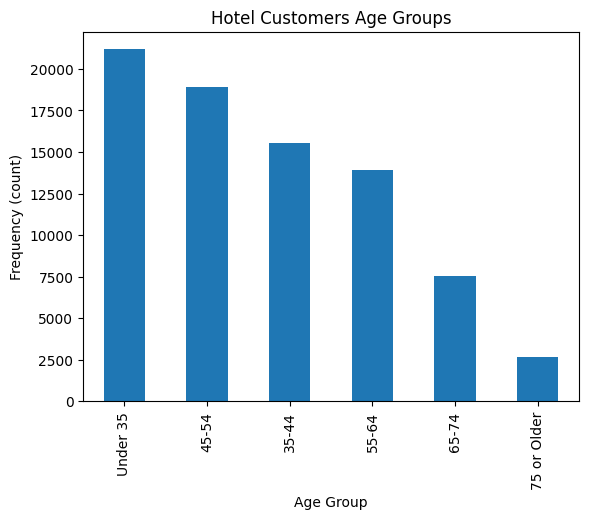

In [18]:
age_d_value_counts = age_d.value_counts()

age_d_value_counts.plot(
    kind="bar",
    xlabel="Age Group",
    ylabel="Frequency (count)",
    title="Hotel Customers Age Groups"
);

We can see that the category with the highest number of customers is Under 35. 

Now, we plot a histogram of Age

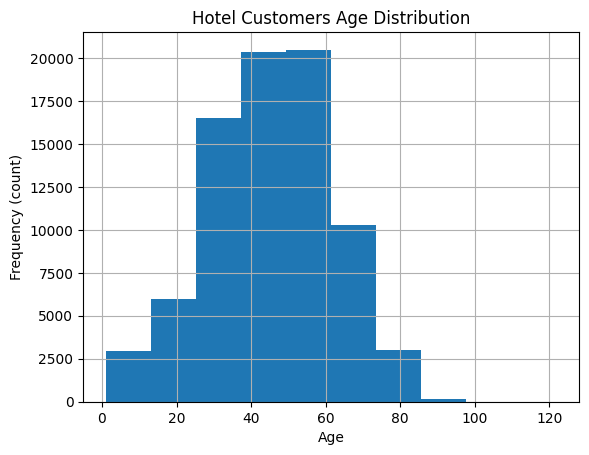

In [19]:
df["Age"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Hotel Customers Age Distribution");

Market Segment

In [20]:
df["MarketSegment"].unique()

array(['Corporate', 'Travel Agent/Operator', 'Other', 'Direct', 'Groups',
       'Complementary', 'Aviation'], dtype=object)

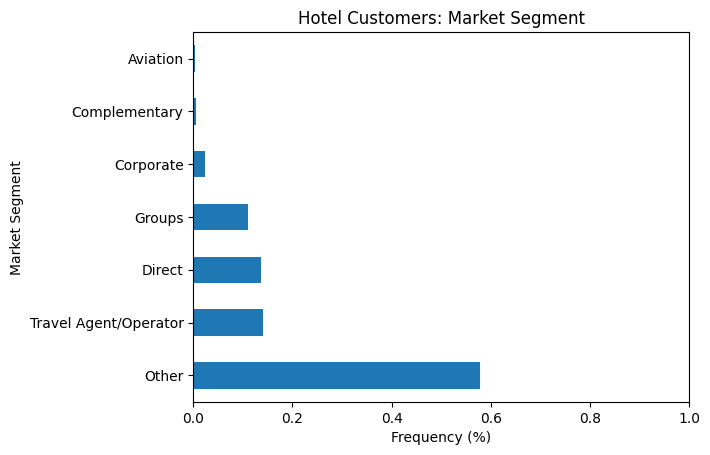

In [21]:
market_segment = df["MarketSegment"].value_counts(normalize=True)

market_segment.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Market Segment")
plt.title("Hotel Customers: Market Segment");

We can see that there are more people in the category Other. The second category is Travel Agent / Operator.

Nationalities

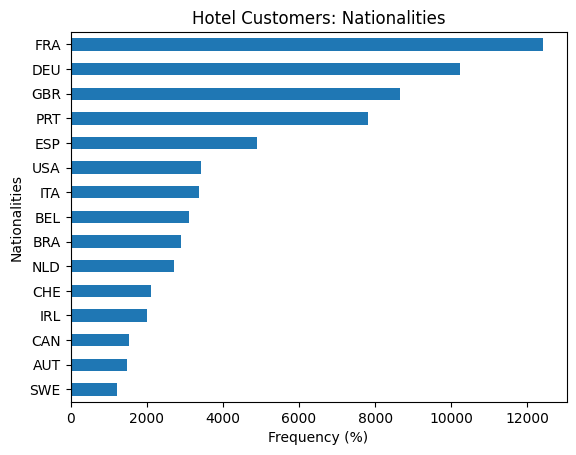

In [22]:

nationalities = df["Nationality"].value_counts().sort_values().tail(15)

nationalities.plot(kind="barh")

plt.xlabel("Frequency (%)")
plt.ylabel("Nationalities")
plt.title("Hotel Customers: Nationalities");

In this graph we can see the first 15 nationalities of hotel guests.

Features used for the model

Now to choose the features that we are going to use for clustering, For this, we are going to select the numerical features that have the largest variance.

First me select the colums with the type number and we create a new data frame called df_number.

In [23]:
df_number = df.select_dtypes(include="number")

We calculate the variance of the features. We choose the 10 features with the largest variance. 

In [24]:
top_ten_var = df_number.var().sort_values().tail(10)
top_ten_var

BookingsCheckedIn          0.476754
RoomNights                 4.827256
PersonsNights             21.047332
Age                      273.174156
AverageLeadTime         7741.521200
OtherRevenue           12694.496495
DaysSinceCreation      96451.287077
DaysSinceLastStay     118069.477390
DaysSinceFirstStay    118580.537687
LodgingRevenue        135495.466251
dtype: float64

Now we are going to make a horizontal bar chart of the ten variables that have the largest variance.

In [25]:
# Create horizontal bar chart of `top_ten_var`
fig = px.bar(
    x = top_ten_var,
    y = top_ten_var.index,
    title = "High Variance Features"
)
fig.update_layout(xaxis_title="Variance", yaxis_title="Feature")

fig.show()

Now we create a boxplot of Lodging Revenue to see if the values are skewed.

In [26]:
fig = px.box(
    data_frame = df_number,
    x = "LodgingRevenue",
    title = "Distribution of LodgingRevenue"
)
fig.update_layout(xaxis_title = "")

fig.show()

We can see that the data is right-skewed. There are outliers. To deal with this we have to use the trimmed variance.

For this reason, we calculate the trimmed variance for the number features in our data frame df_number and with this we create a series top_ten_trim_var with th 10 features with the largest variance.

In [27]:
# Calculate trimmed variance
top_ten_trim_var = df_number.apply(trimmed_var, limits=(0.1,0.1)).sort_values().tail(10)
top_ten_trim_var

SRKingSizeBed             0.218171
RoomNights                1.992299
PersonsNights             8.777445
Age                     125.637813
OtherRevenue           1882.866890
AverageLeadTime        2858.974525
LodgingRevenue        30039.772518
DaysSinceCreation     62135.123323
DaysSinceLastStay     84376.627658
DaysSinceFirstStay    84902.954679
dtype: float64

Now, we make a horizontal bar chart of the top ten trim var.

In [28]:
fig = px.bar(
    x = top_ten_trim_var,
    y = top_ten_trim_var.index,
    title = "High Variance Features"
)
fig.update_layout(xaxis_title="Trimmed Variance", yaxis_title="Feature")

fig.show()

Now we make a list with thefive features with the highest trimmed variance.

In [29]:
high_var_cols = top_ten_trim_var.tail(5).index.to_list()
high_var_cols

['AverageLeadTime',
 'LodgingRevenue',
 'DaysSinceCreation',
 'DaysSinceLastStay',
 'DaysSinceFirstStay']

## Split

We create a matrix called X that contains the columns in high_var_cols.

In [30]:
X = df[high_var_cols]
print("X shape:", X.shape)
X.head()

X shape: (79743, 5)


AverageLeadTime  LodgingRevenue  DaysSinceCreation  DaysSinceLastStay  \
0               45           371.0                150                151   
1                0             0.0               1095                 -1   
2               93           240.0               1095               1100   
3                0             0.0               1095                 -1   
4               58           230.0               1095               1097   

   DaysSinceFirstStay  
0                1074  
1                  -1  
2                1100  
3                  -1  
4                1097

## Build Model

Iterate

Now we are going to put all the variables of the dataset in the same scale.

In the next table, we can see the information that we are going to standardize.

In [31]:
X_summary = X.aggregate(["mean", "std"]).astype(int)
X_summary

AverageLeadTime  LodgingRevenue  DaysSinceCreation  DaysSinceLastStay  \
mean               66             302                446                394   
std                87             368                310                343   

      DaysSinceFirstStay  
mean                 396  
std                  344

We are going to create a Standard Scaler and we are going to use it to transorm the data in X. Then we put this data in X scaled.

In [32]:
ss = StandardScaler()

X_scaled_data = ss.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled_data, columns=X.columns)

print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled shape: (79743, 5)


AverageLeadTime  LodgingRevenue  DaysSinceCreation  DaysSinceLastStay  \
0        -0.248127        0.186528          -0.955062          -0.708545   
1        -0.759576       -0.821365           2.087788          -1.150906   
2         0.297418       -0.169359           2.087788           2.053305   
3        -0.759576       -0.821365           2.087788          -1.150906   
4        -0.100375       -0.196525           2.087788           2.044575   

   DaysSinceFirstStay  
0            1.966998  
1           -1.154798  
2            2.042502  
3           -1.154798  
4            2.033790

Now all the features use the same scale.

In [33]:
X_scaled.aggregate(["mean", "std"]).astype(int)

AverageLeadTime  LodgingRevenue  DaysSinceCreation  DaysSinceLastStay  \
mean                0               0                  0                  0   
std                 1               1                  1                  1   

      DaysSinceFirstStay  
mean                   0  
std                    1

Now we are going to calculate the Inertia and the Silhouette Scores for different number of clusters.

In [34]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

for k in n_clusters:
    model = make_pipeline(StandardScaler(), KMeans(n_clusters=k, random_state=42))
    #fit the model
    model.fit(X)
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    silhouette_scores.append(
        silhouette_score(X,model.named_steps["kmeans"].labels_)
    )

print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [210293.1981387458, 163671.7175206697, 136540.2536815724]

Silhouette Scores: [0.514426676808961, 0.3915403529650723, 0.32715538540172173]


Now we plot the inertia error vs the number of clusters.

In [35]:
fig = px.line(
    x = n_clusters, 
    y = inertia_errors, 
    title="K-Means Model: Inertia vs Number of Clusters"
)
fig.update_layout(xaxis_title = "Number of Clusters", yaxis_title = "Inertia")

fig.show()

Now we plot the silhouette scores vs the number of clusters.

In [36]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(
    x = n_clusters, 
    y = silhouette_scores, 
    title="K-Means Model: Silhouette Score vs Number of Clusters"
)
fig.update_layout(xaxis_title = "Number of Clusters", yaxis_title = "Silhouette Score")
fig.show()

Analyzing the both graphics we can see that the best number of clusters is 5. So now, we build and train a new k-means model named final_model. 

In [37]:
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=5, random_state=42)
)
final_model.fit(X)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

## Communicate

Now we extract the labels of the final_model and asign then to the variable labels.

In [38]:
labels = final_model.named_steps["kmeans"].labels_
print(labels[:5])

[3 1 0 1 0]
[3 1 0 1 0]


Now we create a dataframe named xgb, this is going to contain the mean values of the features in X for each cluster that we obtain in our final model.

In [39]:
xgb = X.groupby(labels).mean()
xgb

AverageLeadTime  LodgingRevenue  DaysSinceCreation  DaysSinceLastStay  \
0        54.511106      315.981305         804.944307         804.321402   
1         4.186295       39.237177         194.558886          16.858434   
2        92.660962     1699.269104         404.898533         392.333333   
3        77.854598      401.670812         280.876616         282.352291   
4       256.227214      333.069235         571.131797         574.091921   

   DaysSinceFirstStay  
0          807.870779  
1           17.101996  
2          410.280359  
3          284.068202  
4          574.317323

AverageLeadTime  LodgingRevenue  DaysSinceCreation  DaysSinceLastStay  \
0        54.511106      315.981305         804.944307         804.321402   
1         4.186295       39.237177         194.558886          16.858434   
2        92.660962     1699.269104         404.898533         392.333333   
3        77.854598      401.670812         280.876616         282.352291   
4       256.227214      333.069235         571.131797         574.091921   

   DaysSinceFirstStay  
0          807.870779  
1           17.101996  
2          410.280359  
3          284.068202  
4          574.317323

Finally, we are going to make a side by side bar chart from xgb, it is going to show the mean of the features in X for each of the clusteers in the final model

In [40]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode="group",
    title="Hotel Clients by Cluster"
)
fig.update_layout(xaxis_title="Cluster", yaxis_title="Value [$]")

fig.show()

We can see that in the cluster 2 the Lodging Revenue is the highest. So, we can analyze what happen with the Other Revenue in the clusters. 

In [41]:
df_labels=df
df_labels["labels"]=labels
df_labels_or=df_labels.groupby("labels")["OtherRevenue"].mean()

In [42]:
fig = px.bar(
    df_labels_or,
    barmode="group",
    title="Hotel Clients by Cluster"
)
fig.update_layout(xaxis_title="Cluster", yaxis_title="Value [$]")

fig.show()

In the graphic we can see that the other revenue mean in the cluster 2 is the highest too. 

To analyze why is this happening, we can analyze the information about other features.

In [43]:
df_labels_summary = df_labels.select_dtypes(include="number").groupby("labels").aggregate(["mean", "std"]).astype(int)

In the next table, we can see the mean and the standard deviation of the numerical features.

In [44]:
df_labels_summary

Age     DaysSinceCreation      AverageLeadTime     LodgingRevenue  \
       mean std              mean  std            mean std           mean   
labels                                                                      
0        46  14               804  149              54  50            315   
1        40  18               194  202               4  13             39   
2        43  15               404  258              92  76           1699   
3        46  14               280  139              77  64            401   
4        54  16               571  187             256  94            333   

            OtherRevenue       ... SRTwinBed     SRNearElevator      \
        std         mean  std  ...      mean std           mean std   
labels                         ...                                    
0       207           81  103  ...         0   0              0   0   
1        94            8   32  ...         0   0              0   0   
2       790          274  314  ...         0   0              0   0   
3       218           81   96  ...         0   0              0   0   
4       208          103   97  ...         0   0              0   0   

       SRAwayFromElevator     SRNoAlcoholInMiniBar     SRQuietRoom      
                     mean std                 mean std        mean std  
labels                                                                  
0                       0   0                    0   0           0   0  
1                       0   0                    0   0           0   0  
2                       0   0                    0   0           0   0  
3                       0   0                    0   0           0   0  
4                       0   0                    0   0           0   0  

[5 rows x 50 columns]

Age     DaysSinceCreation      AverageLeadTime     LodgingRevenue  \
       mean std              mean  std            mean std           mean   
labels                                                                      
0        46  14               804  149              54  50            315   
1        40  18               194  202               4  13             39   
2        43  15               404  258              92  76           1699   
3        46  14               280  139              77  64            401   
4        54  16               571  187             256  94            333   

            OtherRevenue       ... SRTwinBed     SRNearElevator      \
        std         mean  std  ...      mean std           mean std   
labels                         ...                                    
0       207           81  103  ...         0   0              0   0   
1        94            8   32  ...         0   0              0   0   
2       790          274  314  ...         0   0              0   0   
3       218           81   96  ...         0   0              0   0   
4       208          103   97  ...         0   0              0   0   

       SRAwayFromElevator     SRNoAlcoholInMiniBar     SRQuietRoom      
                     mean std                 mean std        mean std  
labels                                                                  
0                       0   0                    0   0           0   0  
1                       0   0                    0   0           0   0  
2                       0   0                    0   0           0   0  
3                       0   0                    0   0           0   0  
4                       0   0                    0   0           0   0  

[5 rows x 50 columns]

If we see the information for the cluster 2, in Persons Nights, we can see that the mean for this feature is the highest. This could be the reason why Lodging Revenue and Other Revenue is the highest for the cluster 2.

Now we are going to create a PCA transformer to reduce dimensionality of X. Now we will have two columns PC1 and PC2

In [45]:
pca = PCA(n_components=2,random_state=42)

X_t = pca.fit_transform(X)

X_pca = pd.DataFrame(X_t, columns=["PC1", "PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (79743, 2)


PC1         PC2
0   120.706258   85.427674
1  -202.668039 -344.642593
2  1153.759957 -293.386910
3  -202.668039 -344.642593
4  1146.959010 -304.085085

X_pca shape: (79743, 2)


PC1         PC2
0   120.707315   85.425764
1  -202.668705 -344.641610
2  1153.759009 -293.386770
3  -202.668705 -344.641610
4  1146.958051 -304.084920

Finally we are going to make a scatter plot with the data we obtain with the PCA transformer.

In [46]:
fig = px.scatter(
    data_frame=X_pca,
    x="PC1",
    y="PC2",
    color=labels.astype(str),
    title="PCA Representation of Clusters"
)
fig.update_layout(xaxis_title="PC1", yaxis_title="PC2")

fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe6898ea-e705-4807-a3d7-bca553de80f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>